In [3]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [5]:
#import 1st file and view

sat_cities = gpd.read_file('../data/satellite_cities.geojson')
sat_cities.head()

,website,area,name,objectid,address,phone,geometry
0,http://ridgetoptn.org/,0.21952569815,Ridgetop,1,"1730 Highway 41 S, Ridgetop, TN 37152",615-859-0596,"MULTIPOLYGON (((-86.77081 36.39310, -86.77063 ..."
1,http://www.goodlettsville.gov/,6.65259345334,Goodlettsville,4,"105 S. Main St., Goodlettsville, TN 37072",615-851-2200,"MULTIPOLYGON (((-86.72170 36.34163, -86.72168 ..."
2,http://www.berryhilltn.org/,0.87926027807,Berry Hill,6,"698 Thompson Lane, Nashville, TN 37204",615-292-5531,"MULTIPOLYGON (((-86.77821 36.12579, -86.77849 ..."
3,http://www.citybellemeade.org/,3.10040455446,Belle Meade,7,"4705 Harding Road, Nashville, TN 37205",615-297-6041,"MULTIPOLYGON (((-86.84794 36.12084, -86.84776 ..."
4,http://www.cityofforesthills.com/,9.11801208992,Forest Hills,8,"6300 Hillsboro Pike, Nashville TN 37215",615-372-8677,"MULTIPOLYGON (((-86.80720 36.08078, -86.80760 ..."


In [6]:
#import 2nd file and view
hist_marker = gpd.read_file('../data/historical_markers.geojson')
hist_marker.head()

,number,location,latitude,marker_name,marker_text,longitude,year_erected,civil_war_site,geometry
0,120,"Hume-Fogg High School, 700 Broadway",36.159303,Randall Jarrell 1914-1965,"Distinguished poet, critic, novelist, and teac...",-86.781572,2005,NaN,POINT (-86.78157 36.15930)
1,78,Belle Meade Boulevard at Warner Park entrance,36.083058,Percy Warner Park 2058.1 Acres,Percy Warner (1861-1927) was a pioneer in elec...,-86.867129,1982,NaN,POINT (-86.86713 36.08306)
2,94,Union Street and Capitol Boulevard,36.163758,Votes for Women,"On August 18, 1920, Tennessee became the 36th ...",-86.78287,1995,NaN,POINT (-86.78287 36.16376)
3,215,Lock 2 Road,36.244216,Lock 2 Park,"In 1888, the U.S. Army Corps of Engineers soug...",-86.70192,2020,NaN,POINT (-86.70192 36.24422)
4,127,Smith Springs Road and Old Murfreesboro Road,36.096776,Una Community,The Una community developed around the crossro...,-86.654516,2008,NaN,POINT (-86.65452 36.09678)


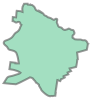

In [15]:
#look at the shape of satellite cities.. doesn't match the exact image from website but not sure if i should panic yet or not.
#NM okay the index tells you the name of the city - so index 1 reflected below is the shape of goodlettsville, index 0 reflects ridgetop which is a weird shape, seen in plot below
sat_cities.loc[1,'geometry']

In [10]:
#printed the same info for image above bc mary did that
print(sat_cities.loc[0,'geometry'])

MULTIPOLYGON (((-86.77080582440412 36.39309897778906, -86.77063453251152 36.39309347588845, -86.77043083981074 36.393110155021475, -86.77008316243717 36.39313434240476, -86.7697275876647 36.39318494906756, -86.76952945857124 36.393214776333046, -86.76941002036824 36.39323091809633, -86.76937918756855 36.3928553406886, -86.76916978556001 36.39144587274106, -86.76909626487095 36.3908727906951, -86.76901369488115 36.39020747069138, -86.76891225130505 36.38955765293781, -86.76813125351352 36.38442043955142, -86.76839980537214 36.384368192173916, -86.77424996605367 36.38952362817365, -86.7745844709279 36.3898214479864, -86.77580734348889 36.390909074288004, -86.77659443265169 36.39162480965434, -86.77644572727844 36.391704873872605, -86.77609436801376 36.391907100288726, -86.77596686574773 36.3919320902808, -86.7756114724593 36.39200029319896, -86.77518808891719 36.392064535482916, -86.77491990279003 36.392156350429104, -86.77489716505778 36.39216245672592, -86.77487473980669 36.39216924773

<Axes: >

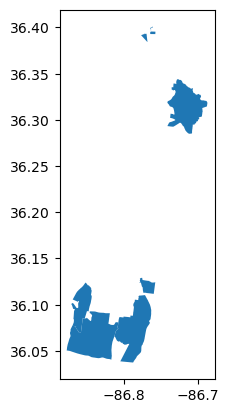

In [16]:
#Plotted the cities and feel better, this is what the image looks like from the website - these are Satellite Cities of Nashville
#higher Image is Goodlettsville (which actually split between Davison and Sumner Co)
#lower image LtR is Belle Meade, Forest Hills, Oak Hill and Berry Hill
sat_cities.plot()

In [17]:
#check shape and view first 5 rows of historical_markers
print(hist_marker.shape)
hist_marker.head()

(255, 9)


,number,location,latitude,marker_name,marker_text,longitude,year_erected,civil_war_site,geometry
0,120,"Hume-Fogg High School, 700 Broadway",36.159303,Randall Jarrell 1914-1965,"Distinguished poet, critic, novelist, and teac...",-86.781572,2005,NaN,POINT (-86.78157 36.15930)
1,78,Belle Meade Boulevard at Warner Park entrance,36.083058,Percy Warner Park 2058.1 Acres,Percy Warner (1861-1927) was a pioneer in elec...,-86.867129,1982,NaN,POINT (-86.86713 36.08306)
2,94,Union Street and Capitol Boulevard,36.163758,Votes for Women,"On August 18, 1920, Tennessee became the 36th ...",-86.78287,1995,NaN,POINT (-86.78287 36.16376)
3,215,Lock 2 Road,36.244216,Lock 2 Park,"In 1888, the U.S. Army Corps of Engineers soug...",-86.70192,2020,NaN,POINT (-86.70192 36.24422)
4,127,Smith Springs Road and Old Murfreesboro Road,36.096776,Una Community,The Una community developed around the crossro...,-86.654516,2008,NaN,POINT (-86.65452 36.09678)


In [18]:
#check info for historical_markers
hist_marker.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   number          255 non-null    object  
 1   location        252 non-null    object  
 2   latitude        245 non-null    object  
 3   marker_name     255 non-null    object  
 4   marker_text     255 non-null    object  
 5   longitude       245 non-null    object  
 6   year_erected    255 non-null    object  
 7   civil_war_site  12 non-null     object  
 8   geometry        244 non-null    geometry
dtypes: geometry(1), object(8)
memory usage: 18.1+ KB


In [19]:
#drop unwanted columns from the historical_markers file (points)
hist_marker = hist_marker[['marker_name', 'geometry']]
hist_marker.head()


,marker_name,geometry
0,Randall Jarrell 1914-1965,POINT (-86.78157 36.15930)
1,Percy Warner Park 2058.1 Acres,POINT (-86.86713 36.08306)
2,Votes for Women,POINT (-86.78287 36.16376)
3,Lock 2 Park,POINT (-86.70192 36.24422)
4,Una Community,POINT (-86.65452 36.09678)


In [20]:
#spatial join
hist_by_sat = gpd.sjoin(hist_marker, sat_cities, op = 'within')

c:\Users\cjami\anaconda3\envs\geospatial\lib\site-packages\IPython\core\interactiveshell.py:3445: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [21]:
#view new variable - 
hist_by_sat.head()

,marker_name,geometry,index_right,website,area,name,objectid,address,phone
57,Mansker’s First Fort,POINT (-86.69987 36.32692),1,http://www.goodlettsville.gov/,6.65259345334,Goodlettsville,4,"105 S. Main St., Goodlettsville, TN 37072",615-851-2200
69,"Battle of Nashville (december 16, 1864) Confed...",POINT (-86.77714 36.07769),5,http://oakhilltn.us/,7.68243330217,Oak Hill,10,"5548 Franklin Pike, Suite 101, Nashville, TN 3...",615-371-8291
70,Granny White Grave,POINT (-86.80710 36.07330),5,http://oakhilltn.us/,7.68243330217,Oak Hill,10,"5548 Franklin Pike, Suite 101, Nashville, TN 3...",615-371-8291
203,Dry-stack Stone Walls,POINT (-86.80438 36.08538),5,http://oakhilltn.us/,7.68243330217,Oak Hill,10,"5548 Franklin Pike, Suite 101, Nashville, TN 3...",615-371-8291
205,Battle of Nashville Peach Orchard Hill,POINT (-86.76913 36.08598),5,http://oakhilltn.us/,7.68243330217,Oak Hill,10,"5548 Franklin Pike, Suite 101, Nashville, TN 3...",615-371-8291


In [22]:
#count the markers
hist_by_sat['name'].value_counts()

name
Oak Hill          5
Goodlettsville    1
Name: count, dtype: int64

In [24]:
#identify historical markers in oak hill
hist_by_OH = hist_by_sat.loc[hist_by_sat['name']== 'Oak Hill']
hist_by_OH.shape

(5, 9)

In [25]:
#identify map of oak hill
polygonOH = sat_cities.loc[sat_cities['name']=='Oak Hill']
polygonOH.shape

(1, 7)

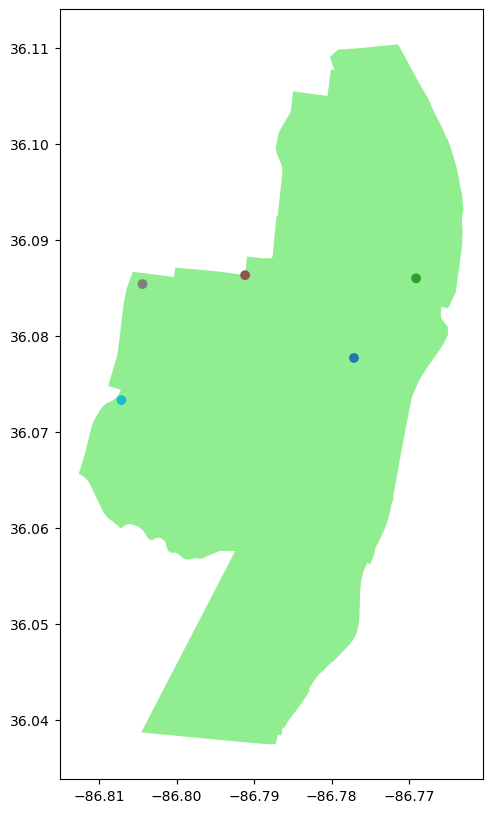

In [28]:
#plot them both together
ax = polygonOH.plot(figsize = (8, 10), color = 'lightgreen')
hist_by_OH.plot( ax = ax, column = 'marker_name');
plt.show();